In [ ]:
!pip install nilearn

     |████████████████████████████████| 4.9 MB 468 kB/s 


In [ ]:
!pip install xgboost

In [ ]:
#Import librairies

import os
import pandas as pd
import numpy as np


import nilearn as nl
from nilearn import plotting as nlp
from nilearn import datasets
from nilearn import image
from nilearn.image import load_img
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
import nilearn
from nilearn import image
from nilearn import datasets

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [ ]:
#Import librairies

import os
import pandas as pd
import numpy as np


import nilearn as nl
from nilearn import plotting as nlp
from nilearn import datasets
from nilearn import image
from nilearn.image import load_img
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn import decomposition
pca = decomposition.PCA

Importing the dataset 

In [ ]:
abide = datasets.fetch_abide_pcp(n_subjects=400,pipeline = "cpac",quality_checked = True)


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Downloaded 85000192 of 104419884 bytes (81.4%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 92274688 of 107986683 bytes (85.5%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 98000896 of 110518334 bytes (88.7%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 115167850 bytes (87.4%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 83877888 of 102974496 bytes (81.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 102850560 of 105723516 bytes (97.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 108702932 bytes (54.0%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 94003200 of 100532666 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 110228275 bytes (91.3%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 92037120 of 112533425 bytes (81.8%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 74055680 of 110058848 bytes (67.3%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 110376924 bytes (83.6%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 77684736 of 102489954 bytes (75.8%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 83877888 of 108195357 bytes (77.5%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 44564480 of 105232630 bytes (42.3%,    1.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 105103360 of 111013388 bytes (94.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 104067786 bytes (48.4%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 67100672 of 107633250 bytes (62.3%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 96714752 of 106714902 bytes (90.6%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 112515401 bytes (82.0%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 92405760 of 111380261 bytes (83.0%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 102850560 of 109481301 bytes (93.9%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 110936064 of 118156589 bytes (93.9%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 101609576 bytes (99.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 114979022 bytes (87.5%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 92266496 of 108536527 bytes (85.0%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 65355776 of 100315008 bytes (65.2%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 106160128 of 112518259 bytes (94.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 105071443 bytes (95.8%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 108382438 bytes (92.9%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 105127936 of 105424334 bytes (99.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 107697423 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 92266496 of 102831611 bytes (89.7%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 105868787 bytes (87.2%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 53051392 of 110373167 bytes (48.1%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 106676912 bytes (55.0%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 67100672 of 95467541 bytes (70.3%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 54435840 of 107811709 bytes (50.5%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 102850560 of 103013827 bytes (99.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 99770368 of 109340774 bytes (91.2%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 99483648 of 110403873 bytes (90.1%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 85516288 of 102741119 bytes (83.2%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 54018048 of 113831652 bytes (47.5%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 102054140 bytes (57.5%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 88489984 of 109775490 bytes (80.6%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 113491968 of 119693152 bytes (94.8%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 113491968 of 114295718 bytes (99.3%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 113508352 of 115673440 bytes (98.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 90513408 of 109552949 bytes (82.6%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 47161344 of 105507823 bytes (44.7%,    1.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 122660208 bytes (82.1%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 109215744 of 122066162 bytes (89.5%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 83877888 of 125524859 bytes (66.8%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 96657408 of 119530321 bytes (80.9%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 105545728 of 128732335 bytes (82.0%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 59834368 of 114050974 bytes (52.5%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 118377207 bytes (42.5%,    1.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 104136704 of 129287582 bytes (80.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 109838336 of 120564753 bytes (91.1%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 110436352 of 123902251 bytes (89.1%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 107249664 of 122851217 bytes (87.3%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 119903539 bytes (77.0%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 119250944 of 124953879 bytes (95.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 107102208 of 118668066 bytes (90.3%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 89063424 of 121318546 bytes (73.4%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 98197504 of 113306058 bytes (86.7%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 110436352 of 120938259 bytes (91.3%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 122574265 bytes (95.8%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 116465664 of 122383426 bytes (95.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 103383040 of 119210228 bytes (86.7%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 67100672 of 116086868 bytes (57.8%,    1.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 96968704 of 122156869 bytes (79.4%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 81469440 of 125357066 bytes (65.0%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 87638016 of 118740494 bytes (73.8%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 92733440 of 117185869 bytes (79.1%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 92110848 of 121608785 bytes (75.7%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 99770368 of 116464120 bytes (85.7%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 106356736 of 123786681 bytes (85.9%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 44294144 of 47213495 bytes (93.8%,    0.1s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 44662784 of 49642517 bytes (90.0%,    0.1s remaining) ...done. (1 seconds, 0 min)


Downloaded 35495936 of 47760083 bytes (74.3%,    0.3s remaining) ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 32210944 of 48202845 bytes (66.8%,    0.5s remaining) ...done. (1 seconds, 0 min)


Downloaded 47693824 of 48390941 bytes (98.6%,    0.0s remaining) ...done. (1 seconds, 0 min)


Downloaded 43876352 of 48377928 bytes (90.7%,    0.1s remaining) ...done. (1 seconds, 0 min)


Downloaded 41934848 of 48219077 bytes (87.0%,    0.2s remaining) ...done. (1 seconds, 0 min)


Downloaded 25157632 of 47925361 bytes (52.5%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 40189952 of 46953991 bytes (85.6%,    0.2s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 41934848 of 49707872 bytes (84.4%,    0.2s remaining) ...done. (1 seconds, 0 min)


Downloaded 48578560 of 49440455 bytes (98.3%,    0.0s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 41934848 of 48581667 bytes (86.3%,    0.2s remaining) ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Downloaded 41492480 of 48926488 bytes (84.8%,    0.2s remaining) ...done. (1 seconds, 0 min)


Downloaded 54820864 of 103307732 bytes (53.1%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 64151552 of 104869475 bytes (61.2%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 41934848 of 95474541 bytes (43.9%,    1.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 42065920 of 107870342 bytes (39.0%,    3.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 87523328 of 103306942 bytes (84.7%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 86597632 of 102761508 bytes (84.3%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 101015070 bytes (91.3%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 77791232 of 97961086 bytes (79.4%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 96935936 of 102625489 bytes (94.5%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 58712064 of 105533255 bytes (55.6%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 92266496 of 107072040 bytes (86.2%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 106884892 bytes (86.3%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 92241920 of 100240888 bytes (92.0%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 50323456 of 100130834 bytes (50.3%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 77889536 of 102821793 bytes (75.8%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 91357184 of 106424505 bytes (85.8%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 90849280 of 104764204 bytes (86.7%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 56770560 of 101762563 bytes (55.8%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 103476731 bytes (48.6%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 52625408 of 99319344 bytes (53.0%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 54370304 of 106144149 bytes (51.2%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 84017152 of 98283071 bytes (85.5%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 96666269 bytes (60.7%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 80920576 of 109179568 bytes (74.1%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 73957376 of 104315489 bytes (70.9%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 96493568 of 100755881 bytes (95.8%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 55623680 of 104049488 bytes (53.5%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 76013568 of 88100076 bytes (86.3%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 63848448 of 82149656 bytes (77.7%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 49438720 of 81739638 bytes (60.5%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 79578720 bytes (63.2%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 79167312 bytes (74.2%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 41017344 of 85134814 bytes (48.2%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 78217216 of 84685546 bytes (92.4%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 61915136 of 86433443 bytes (71.6%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 89827896 bytes (65.4%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 82403522 bytes (61.1%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 58712064 of 89196011 bytes (65.8%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 86734034 bytes (58.0%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 85240741 bytes (59.0%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 59564032 of 89255889 bytes (66.7%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 83877888 of 89696906 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 52854784 of 88226898 bytes (59.9%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 68943872 of 85619700 bytes (80.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 56082432 of 85749288 bytes (65.4%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 44597248 of 80406871 bytes (55.5%,    0.8s remaining) ...done. (2 seconds, 0 min)


Downloaded 53133312 of 86334444 bytes (61.5%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 41934848 of 82453566 bytes (50.9%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 67919872 of 81189491 bytes (83.7%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 71827456 of 80788761 bytes (88.9%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 51847168 of 88438528 bytes (58.6%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 60907520 of 82657156 bytes (73.7%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 52518912 of 82083586 bytes (64.0%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 60571648 of 88311033 bytes (68.6%,    0.5s remaining) ...done. (2 seconds, 0 min)


Downloaded 71507968 of 84832785 bytes (84.3%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 51421184 of 83958604 bytes (61.2%,    0.6s remaining) ...done. (2 seconds, 0 min)


Downloaded 83877888 of 85078204 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 41934848 of 85316744 bytes (49.2%,    1.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 50323456 of 83650716 bytes (60.2%,    0.7s remaining) ...done. (2 seconds, 0 min)


Downloaded 75268096 of 84223335 bytes (89.4%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 187392000 of 204073805 bytes (91.8%,    0.4s remaining) ...done. (5 seconds, 0 min)


Downloaded 146432000 of 173382781 bytes (84.5%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 125820928 of 170223641 bytes (73.9%,    1.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 152051712 of 178755670 bytes (85.1%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 176860851 bytes (75.9%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 180574638 bytes (83.6%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 142868480 of 168785580 bytes (84.6%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 176152576 of 190222690 bytes (92.6%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 154804224 of 178264954 bytes (86.8%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 162807808 of 167834099 bytes (97.0%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 186119228 bytes (72.1%,    1.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 151126016 of 178023482 bytes (84.9%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 169555833 bytes (94.0%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 159375360 of 175713626 bytes (90.7%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 164175872 of 178961772 bytes (91.7%,    0.4s remaining) ...done. (5 seconds, 0 min)


Downloaded 169443328 of 185573106 bytes (91.3%,    0.4s remaining) ...done. (5 seconds, 0 min)


Downloaded 161759232 of 172936675 bytes (93.5%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 151904256 of 175332801 bytes (86.6%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 180845447 bytes (92.8%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 169664512 of 191049237 bytes (88.8%,    0.5s remaining) ...done. (5 seconds, 0 min)


Downloaded 151461888 of 175033265 bytes (86.5%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 166019072 of 183210908 bytes (90.6%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 176177152 of 183517814 bytes (96.0%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 176111616 of 193110768 bytes (91.2%,    0.4s remaining) ...done. (5 seconds, 0 min)


Downloaded 169959424 of 181419865 bytes (93.7%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 166019072 of 186111162 bytes (89.2%,    0.5s remaining) ...done. (5 seconds, 0 min)


Downloaded 121880576 of 171247565 bytes (71.2%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 167763968 of 171921893 bytes (97.6%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 151478272 of 180173552 bytes (84.1%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 172212224 of 172996955 bytes (99.5%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 142737408 of 176194779 bytes (81.0%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 163068163 bytes (82.3%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 172212224 of 173242576 bytes (99.4%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 183055905 bytes (91.6%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 174432256 of 183734194 bytes (94.9%,    0.2s remaining) ...done. (5 seconds, 0 min)


Downloaded 128548864 of 168430232 bytes (76.3%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 131055616 of 176080760 bytes (74.4%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 130031616 of 171687355 bytes (75.7%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 174407680 of 197028587 bytes (88.5%,    0.5s remaining) ...done. (5 seconds, 0 min)


Downloaded 183255040 of 191276384 bytes (95.8%,    0.2s remaining) ...done. (6 seconds, 0 min)


Downloaded 169435136 of 182230155 bytes (93.0%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 157630464 of 166196097 bytes (94.8%,    0.2s remaining) ...done. (5 seconds, 0 min)


Downloaded 156884992 of 175007222 bytes (89.6%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 147914752 of 184875700 bytes (80.0%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 168213614 bytes (84.8%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 168203795 bytes (79.8%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 170906006 bytes (93.3%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 167583744 of 169005844 bytes (99.2%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 169959424 of 174877929 bytes (97.2%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 141705216 of 179967348 bytes (78.7%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 175761902 bytes (81.1%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 98910208 of 160233346 bytes (61.7%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 142598144 of 179124624 bytes (79.6%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 163236147 bytes (92.5%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 174503420 bytes (91.3%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 141090816 of 168590612 bytes (83.7%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 147046400 of 181339129 bytes (81.1%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 139894784 of 177659615 bytes (78.7%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 153255936 of 176832838 bytes (86.7%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 155435008 of 184333005 bytes (84.3%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 141361152 of 170205457 bytes (83.1%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 134512640 of 177844277 bytes (75.6%,    1.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 148602880 of 169917259 bytes (87.5%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 167862272 of 186766545 bytes (89.9%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 176435952 bytes (80.8%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 166879232 of 177652043 bytes (93.9%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 144465920 of 184940407 bytes (78.1%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 136101888 of 176761855 bytes (77.0%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 185270437 bytes (77.0%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 181049499 bytes (74.1%,    1.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 175972352 of 179891882 bytes (97.8%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 117432320 of 175135413 bytes (67.1%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 179003392 of 186560889 bytes (95.9%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 171909120 of 185921538 bytes (92.5%,    0.4s remaining) ...done. (6 seconds, 0 min)


Downloaded 138657792 of 165140896 bytes (84.0%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 174407680 of 177246329 bytes (98.4%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 149561344 of 182643223 bytes (81.9%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 174900214 bytes (86.3%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 131465216 of 162764191 bytes (80.8%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 140951552 of 184201427 bytes (76.5%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 142606336 of 182811938 bytes (78.0%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 125960192 of 178949727 bytes (70.4%,    1.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 166019072 of 175242882 bytes (94.7%,    0.2s remaining) ...done. (5 seconds, 0 min)


Downloaded 135487488 of 168734942 bytes (80.3%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 172212224 of 173223110 bytes (99.4%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 170395138 bytes (88.6%,    0.5s remaining) ...done. (5 seconds, 0 min)


Downloaded 160768000 of 167482990 bytes (96.0%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 161570816 of 179904293 bytes (89.8%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 166281216 of 167176041 bytes (99.5%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 128540672 of 163554501 bytes (78.6%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 161570816 of 181893759 bytes (88.8%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 134168576 of 173526429 bytes (77.3%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 126664704 of 172312584 bytes (73.5%,    1.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 142598144 of 175380951 bytes (81.3%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 167952384 of 173684314 bytes (96.7%,    0.1s remaining) ...done. (4 seconds, 0 min)


Downloaded 140607488 of 162967861 bytes (86.3%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 188789339 bytes (80.0%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 186624540 bytes (89.9%,    0.5s remaining) ...done. (5 seconds, 0 min)


Downloaded 200433664 of 250820577 bytes (79.9%,    1.0s remaining) ...done. (5 seconds, 0 min)


Downloaded 162103296 of 181950354 bytes (89.1%,    0.6s remaining) ...done. (6 seconds, 0 min)


Downloaded 140976128 of 179438367 bytes (78.6%,    0.9s remaining) ...done. (4 seconds, 0 min)


Downloaded 138035200 of 172704241 bytes (79.9%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 159727616 of 172872930 bytes (92.4%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 150102016 of 171854040 bytes (87.3%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 177774422 bytes (84.9%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 125820928 of 183231377 bytes (68.7%,    1.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 173318144 of 174866146 bytes (99.1%,    0.0s remaining) ...done. (4 seconds, 0 min)


Downloaded 153288704 of 175276557 bytes (87.5%,    0.6s remaining) ...done. (5 seconds, 0 min)


Downloaded 156098560 of 179385641 bytes (87.0%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 154296320 of 177744953 bytes (86.8%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 167763968 of 179464905 bytes (93.5%,    0.3s remaining) ...done. (5 seconds, 0 min)


Downloaded 150994944 of 173896811 bytes (86.8%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 150986752 of 177057224 bytes (85.3%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 144515072 of 173726573 bytes (83.2%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 147709952 of 165926067 bytes (89.0%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 128016384 of 172719519 bytes (74.1%,    1.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 147144704 of 169561738 bytes (86.8%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 153182208 of 185185275 bytes (82.7%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 140247040 of 169029807 bytes (83.0%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 159375360 of 179041172 bytes (89.0%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 117432320 of 140445735 bytes (83.6%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 107298816 of 133502893 bytes (80.4%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 134209536 of 139285007 bytes (96.4%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 140853248 of 150281654 bytes (93.7%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 121880576 of 144407349 bytes (84.4%,    0.6s remaining) ...done. (4 seconds, 0 min)


Downloaded 131268608 of 139918220 bytes (93.8%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 121831424 of 136104861 bytes (89.5%,    0.4s remaining) ...done. (4 seconds, 0 min)


Downloaded 129720320 of 142229599 bytes (91.2%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 89743360 of 138860063 bytes (64.6%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 111910912 of 140308694 bytes (79.8%,    0.8s remaining) ...done. (4 seconds, 0 min)


Downloaded 125820928 of 132698868 bytes (94.8%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 134209536 of 137363645 bytes (97.7%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 98910208 of 135690435 bytes (72.9%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 136299815 bytes (73.8%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 143696232 bytes (70.0%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 111771648 of 152354449 bytes (73.4%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 100868096 of 139930173 bytes (72.1%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 155946302 bytes (69.9%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 139492072 bytes (72.2%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 143261250 bytes (82.0%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 124076032 of 137895620 bytes (90.0%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 127623168 of 133422609 bytes (95.7%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 125100032 of 137157327 bytes (91.2%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 147046400 of 147253098 bytes (99.9%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 140445001 bytes (77.6%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 96657408 of 137483496 bytes (70.3%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 130721576 bytes (83.4%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 99295232 of 137559064 bytes (72.2%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 113491968 of 138490381 bytes (81.9%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 93724672 of 139265147 bytes (67.3%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 141492763 bytes (65.2%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 103047168 of 139601792 bytes (73.8%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 87531520 of 133993946 bytes (65.3%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 129501596 bytes (77.7%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 135509935 bytes (80.5%,    0.7s remaining) ...done. (4 seconds, 0 min)


Downloaded 92266496 of 134193929 bytes (68.8%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 98926592 of 136959320 bytes (72.2%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 131457024 of 131538383 bytes (99.9%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 134268028 bytes (75.0%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 139985417 bytes (77.9%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 100466688 of 135763780 bytes (74.0%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 91717632 of 140503474 bytes (65.3%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 125960192 of 132995013 bytes (94.7%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 134209536 of 138762617 bytes (96.7%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 104120320 of 133258192 bytes (78.1%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 139599195 bytes (72.1%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 134074386 bytes (75.1%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 98910208 of 138237154 bytes (71.6%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 104538112 of 132076598 bytes (79.1%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 92086272 of 136362024 bytes (67.5%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 102662144 of 140042608 bytes (73.3%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 145273888 bytes (80.8%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 89849856 of 135076421 bytes (66.5%,    1.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 138494302 bytes (72.7%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 136404992 of 136796649 bytes (99.7%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 83386368 of 134447301 bytes (62.0%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 129777664 of 139056644 bytes (93.3%,    0.2s remaining) ...done. (4 seconds, 0 min)


Downloaded 134209536 of 146948347 bytes (91.3%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 100646912 of 137508548 bytes (73.2%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 113475584 of 139233353 bytes (81.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 121847808 of 132307173 bytes (92.1%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 109043712 of 139633718 bytes (78.1%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 125820928 of 142811992 bytes (88.1%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 132703376 bytes (82.2%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 111173632 of 136772955 bytes (81.3%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 100818944 of 138518473 bytes (72.8%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 102940672 of 144950049 bytes (71.0%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 100433920 of 120171179 bytes (83.6%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 100958208 of 117156273 bytes (86.2%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 100646912 of 121087221 bytes (83.1%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 78217216 of 117103366 bytes (66.8%,    1.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 92405760 of 116631542 bytes (79.2%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 83877888 of 114814661 bytes (73.1%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 95748096 of 124761782 bytes (76.7%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 123387904 of 129519697 bytes (95.3%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 75497472 of 120868445 bytes (62.5%,    1.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 122101760 of 123230298 bytes (99.1%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 96100352 of 119348832 bytes (80.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 95117312 of 124458048 bytes (76.4%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 100810752 of 122948334 bytes (82.0%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 95494144 of 123440333 bytes (77.4%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 118939648 of 127251738 bytes (93.5%,    0.9s remaining) ...done. (14 seconds, 0 min)


Downloaded 97026048 of 122188442 bytes (79.4%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 132071424 of 132363471 bytes (99.8%,    0.0s remaining) ...done. (3 seconds, 0 min)


Downloaded 84410368 of 118643491 bytes (71.1%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 118562278 bytes (84.9%,    0.4s remaining) ...done. (3 seconds, 0 min)


Downloaded 108855296 of 121285900 bytes (89.8%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 100745216 of 125119187 bytes (80.5%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 92872704 of 124096742 bytes (74.8%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 58712064 of 112783960 bytes (52.1%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 105668608 of 114477563 bytes (92.3%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 85983232 of 121472583 bytes (70.8%,    0.8s remaining) ...done. (3 seconds, 0 min)


Downloaded 56049664 of 106373800 bytes (52.7%,    0.9s remaining) ...done. (2 seconds, 0 min)


Downloaded 83877888 of 122335851 bytes (68.6%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 101777408 of 126737583 bytes (80.3%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 105324544 of 123096512 bytes (85.6%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 94044160 of 126777465 bytes (74.2%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 83877888 of 122845365 bytes (68.3%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 119513741 bytes (91.2%,    0.2s remaining) ...done. (3 seconds, 0 min)


Downloaded 106848256 of 124089636 bytes (86.1%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 104857600 of 121313316 bytes (86.4%,    0.3s remaining) ...done. (3 seconds, 0 min)


Downloaded 92266496 of 123446223 bytes (74.7%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 117571584 of 120376102 bytes (97.7%,    0.1s remaining) ...done. (3 seconds, 0 min)


Downloaded 85295104 of 121896937 bytes (70.0%,    0.9s remaining) ...done. (3 seconds, 0 min)


Downloaded 114237440 of 132645118 bytes (86.1%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 100139008 of 128778417 bytes (77.8%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 96174080 of 124095222 bytes (77.5%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 94134272 of 124557732 bytes (75.6%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 106512384 of 138163816 bytes (77.1%,    0.6s remaining) ...done. (3 seconds, 0 min)


Downloaded 128655360 of 161351783 bytes (79.7%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 109043712 of 121759875 bytes (89.6%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 149143552 of 164600761 bytes (90.6%,    0.3s remaining) ...done. (4 seconds, 0 min)


Downloaded 109043712 of 133481851 bytes (81.7%,    0.5s remaining) ...done. (3 seconds, 0 min)


Downloaded 100646912 of 133842077 bytes (75.2%,    0.7s remaining) ...done. (3 seconds, 0 min)


Downloaded 117432320 of 135317099 bytes (86.8%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 117432320 of 136666507 bytes (85.9%,    0.5s remaining) ...done. (4 seconds, 0 min)


Downloaded 100884480 of 136833786 bytes (73.7%,    0.7s remaining) ...done. (3 seconds, 0 min)


In [ ]:
output_dir = "/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal"

In [ ]:
data_dir="/root/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal"
PCA = decomposition.PCA

This fuction extract features from the dataset using each correlation matrix extracted from the dataset then added to features ,finally stored in a file named "ABIDE_BASC064_features"  and for  dimensionality reduction we used PCA to keep 99% of variance then we transformed teh phenotypic data into a dataset and determined the target 





In [ ]:
def prepare_data(output_dir):
  
    # make list of filenames
    fmri_filenames = abide.func_preproc

    # load atlas
    multiscale = datasets.fetch_atlas_basc_multiscale_2015()
    atlas_filename = multiscale.scale064

    # initialize masker object
    masker = NiftiLabelsMasker(labels_img=atlas_filename,
                               standardize=True,
                               memory='nilearn_cache',
                               verbose=0)

    # initialize correlation measure
    correlation_measure = ConnectivityMeasure(kind='correlation', vectorize=True,
                                             discard_diagonal=True)

    try: # check if feature file already exists
        # load features
        feat_file = os.path.join(output_dir, 'ABIDE_BASC064_features.npz')
        X_features = np.load(feat_file)['a']
        print("Feature file found.")

    except: # if not, extract features
        X_features = [] # To contain upper half of matrix as 1d array
        print("No feature file found. Extracting features...")

        for i,sub in enumerate(fmri_filenames):
            # extract the timeseries from the ROIs in the atlas
            time_series = masker.fit_transform(sub)
            # create a region x region correlation matrix
            correlation_matrix = correlation_measure.fit_transform([time_series])[0]
            # add to our container
            X_features.append(correlation_matrix)
            # keep track of status
            print('finished extracting %s of %s'%(i+1,len(fmri_filenames)))
        # Save features
        np.savez_compressed(os.path.join(output_dir, 'ABIDE_BASC064_features'),
                                         a = X_features)

    # Dimensionality reduction of features with PCA
    print("Running PCA...")
    pca = PCA(0.99).fit(X_features) # keeping 99% of variance
    X_features_pca = pca.transform(X_features)

    # Transform phenotypic data into dataframe
    abide_pheno = pd.DataFrame(abide.phenotypic)

    # Get the target vector
    y_target = abide_pheno['DX_GROUP']

    return X_features_pca, y_target

In [ ]:
#calling the prepare_data function
prepare_data(output_dir)



Dataset created in /root/nilearn_data/basc_multiscale_2015



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/basc_multiscale_2015/3cbcf0eeb3f666f55070aba1db9a758f/1861819..... done.


No feature file found. Extracting features...
finished extracting 1 of 400
finished extracting 2 of 400
finished extracting 3 of 400
finished extracting 4 of 400
finished extracting 5 of 400
finished extracting 6 of 400
finished extracting 7 of 400
finished extracting 8 of 400
finished extracting 9 of 400
finished extracting 10 of 400
finished extracting 11 of 400
finished extracting 12 of 400
finished extracting 13 of 400
finished extracting 14 of 400
finished extracting 15 of 400
finished extracting 16 of 400
finished extracting 17 of 400
finished extracting 18 of 400
finished extracting 19 of 400
finished extracting 20 of 400
finished extracting 21 of 400
finished extracting 22 of 400
finished extracting 23 of 400
finished extracting 24 of 400
finished extracting 25 of 400
finished extracting 26 of 400
finished extracting 27 of 400
finished extracting 28 of 400
finished extracting 29 of 400
finished extracting 30 of 400
finished extracting 31 of 400
finished extracting 32 of 400
fin

(array([[ 4.89361883,  2.01087684,  1.76543538, ...,  0.11600527,
          0.06495647,  0.02620383],
        [ 0.41116838,  1.11597059, -0.40897407, ...,  0.04914543,
         -0.06205467,  0.04684183],
        [ 4.49304876, -2.08375053,  0.9174872 , ..., -0.12616619,
          0.02934147, -0.08441377],
        ...,
        [ 3.97006265, -3.26124856,  1.97550678, ..., -0.08456092,
          0.07482619, -0.15571633],
        [ 5.1986927 , -1.74136393,  2.45196408, ..., -0.09189767,
         -0.01114782,  0.13715875],
        [ 2.40525558, -2.99073753,  1.54204988, ..., -0.02176138,
         -0.06993603,  0.03123622]]), 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 395    1
 396    1
 397    2
 398    2
 399    2
 Name: DX_GROUP, Length: 400, dtype: int64)

In [ ]:
abide

{'description': b'ABIDE\n\n\nNotes\n-----\nThe Autism Brain Imaging Data Exchange (ABIDE) dataset provides previously\ncollected resting state functional magnetic resonance imaging datasets\nfrom 539 individuals with ASD and 573 typical controls for the purpose\nof data sharing in the broader scientific community. This grass-root\ninitiative involved 16 international sites, sharing 20 samples yielding\n1112 datasets composed of both MRI data and an extensive array of\nphenotypic information common across nearly all sites (see below).\n\nNote that this is the preprocessed version of ABIDE provided by the\npreprocess connectome projects (PCP).\n\n\nContent\n-------\n    :\'phenotypic\': Behavioral information.\n\n\nReferences\n----------\n\nFor more information about this dataset\'s structure:\nhttp://preprocessed-connectomes-project.github.io\nhttp://www.childmind.org/en/healthy-brain-network/abide/\n\nNielsen, Jared A., et al. "Multisite functional connectivity MRI\nclassification of a

In [ ]:
#getting the features from the previously listed file
feat_file = os.path.join(output_dir, 'ABIDE_BASC064_features.npz')
X_features = np.load(feat_file)['a']

X_features.shape

(400, 2016)

In [ ]:
pca = PCA(0.99).fit(X_features) # keeping 99% of variance
X_features_pca = pca.transform(X_features)

    # Transform phenotypic data into dataframe
abide_pheno = pd.DataFrame(abide.phenotypic)

    # Get the target vector
y_target = abide_pheno['DX_GROUP']


In [ ]:
X_features=X_features_pca

In [ ]:
#defining the target and splitting the dataset into train set and test set 
y_target=abide.phenotypic["DX_GROUP"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X_features, y_target, test_size=0.20, shuffle = True, # shuffle dataset
stratify = y_target)

In [ ]:
ytrain

array([1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2,

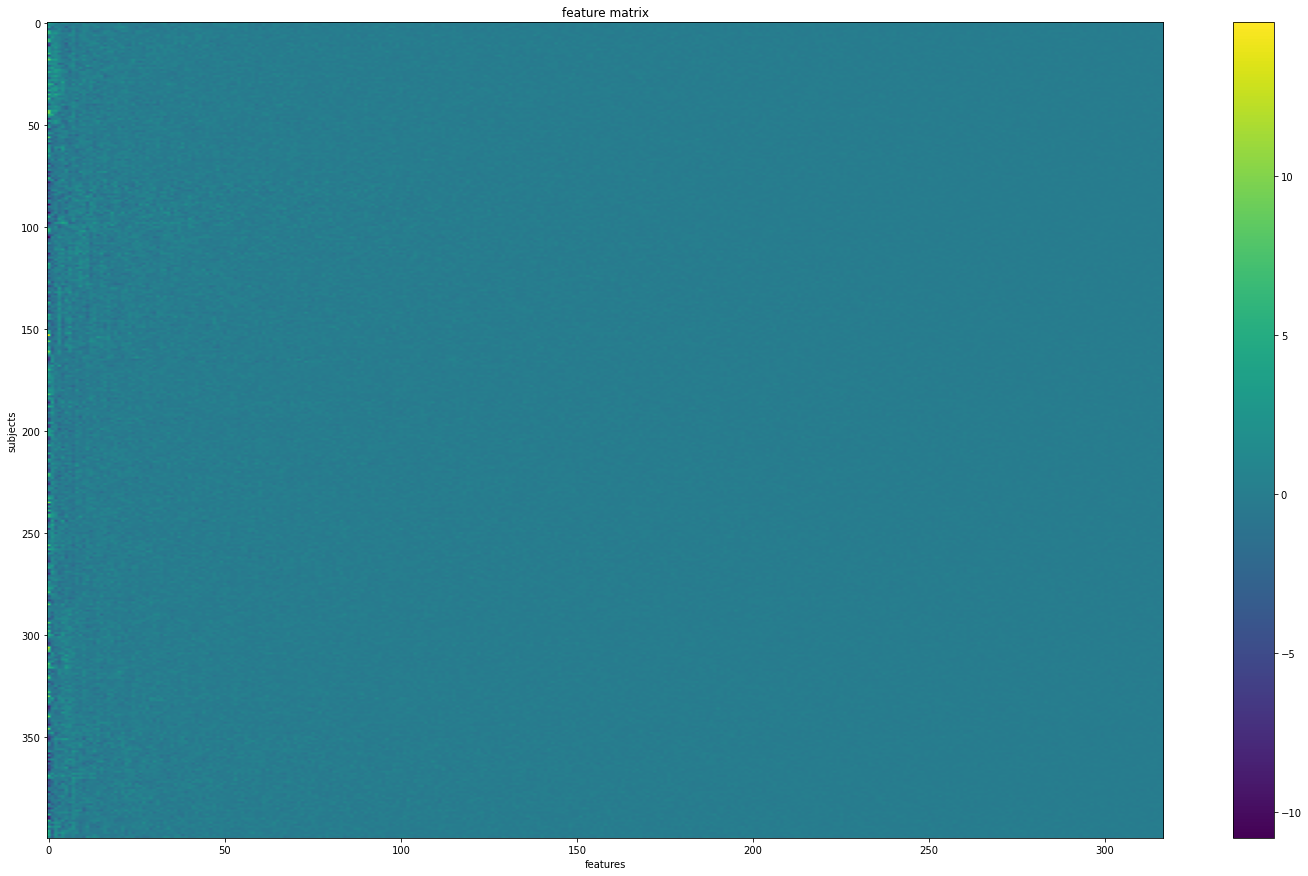

In [ ]:
#Plot feature matrix

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

plt.gcf().set_size_inches(25, 15)

In [ ]:
# this function determines the mean of scores
def compute_acc_std_mean (train_scores, test_scores):
    #train scores
    train_scores_mean= np.mean(train_scores, axis=1)
    train_scores_std= np.std(train_scores, axis=1)
    
    #test scores
    test_scores_mean= np.mean(test_scores, axis=1)
    test_scores_std= np.std(test_scores, axis=1)
    
    return train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

In [ ]:
#this function plots the validation curve 
def plot_validationcurve (param, param_range, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std):
    plt.title("Validation Curve")
    plt.xlabel("Hyperparameter : {}".format(param))
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw=2
    #plot train scores
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    
    #plot test scores
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    
    plt.legend(loc="best")
    plt.gcf().set_size_inches(25, 15)
    
    return plt.show()

In [ ]:
#the function determines the best hyperparametres to use
def best_estimator(model, param_grid, X, y, cv):
    grid = GridSearchCV (model, param_grid, cv=cv)
    grid.fit(X, y)
    model_best= grid.best_estimator_
    param_best= grid.best_params_
    
    return model_best , param_best

#DECISION_TREE

In [ ]:
param_range_tree = np.arange (1, 11 , 1)

model_tree = DecisionTreeClassifier()

In [ ]:
train_scores_tree, test_scores_tree = validation_curve(
    DecisionTreeClassifier(), X_features, y_target, param_name="max_depth", param_range=param_range_tree,
    scoring="accuracy", n_jobs=1)

In [ ]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std= compute_acc_std_mean (train_scores_tree, test_scores_tree)

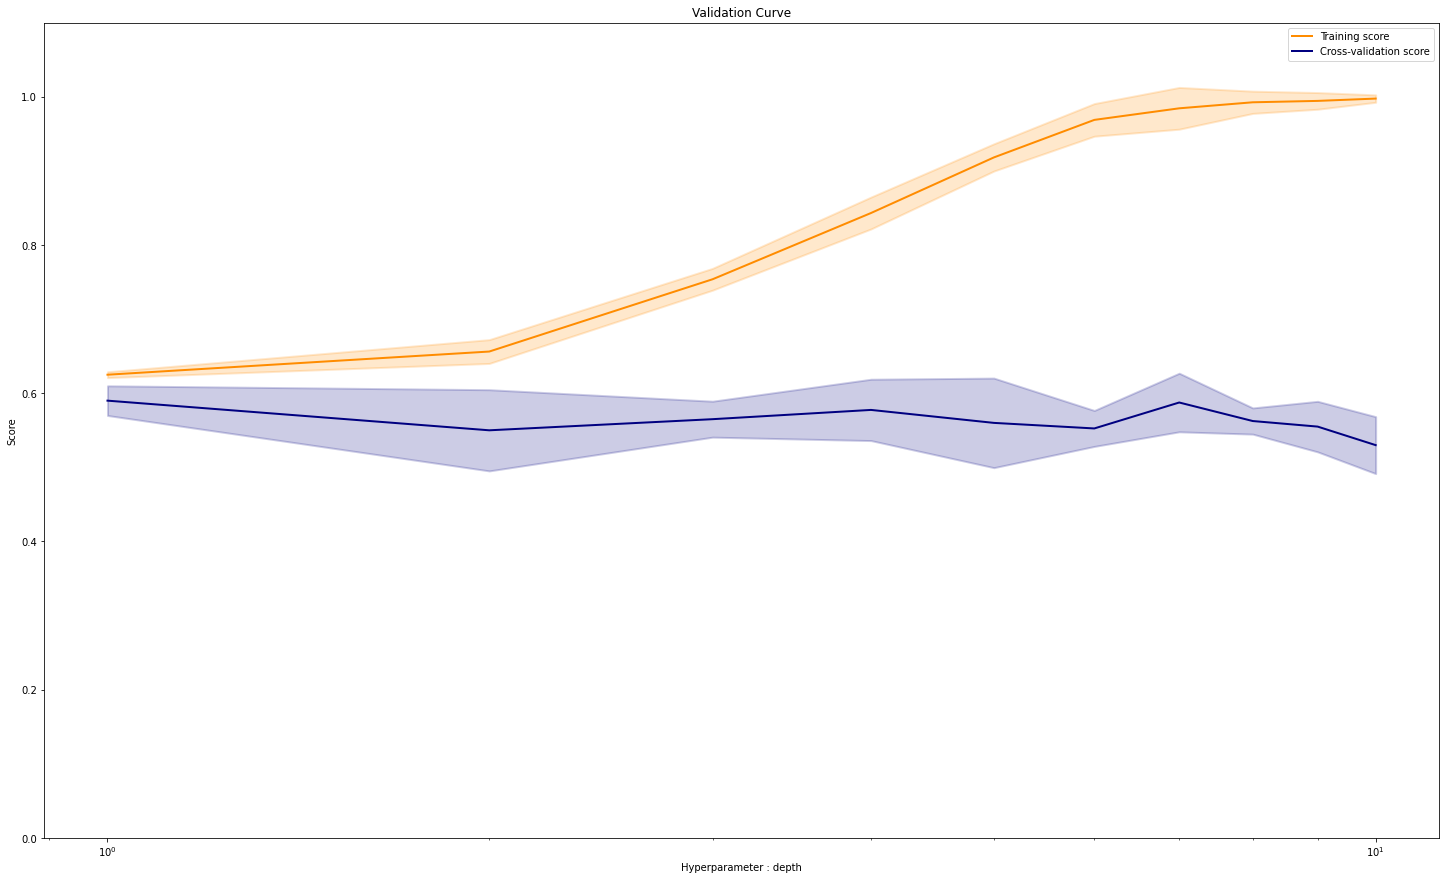

In [ ]:
plot_validationcurve("depth", param_range_tree, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std)

In [ ]:
#model.get_params().keys()
model_tree = DecisionTreeClassifier()
param_grid = {'max_depth': [1, 2 , 3, 4, 5, 6, 10]}

best_estimator(model_tree, param_grid, X_features, y_target, 10)

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'), {'max_depth': 1})

In [ ]:
model_best_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best')
                                        
score_kfold =cross_val_score (model_best_tree, X_features, y_target, cv=10).mean() #cv is the number of folds
print("The accuracy score for 10-folds is : " , score_kfold)

The accuracy score for 10-folds is :  0.585


In [ ]:
score_leave_one_out = cross_val_score (model_best_tree, X_features, y_target, cv=LeaveOneOut()).mean()
print("The accuracy score for leave-one out is: ", score_leave_one_out)

The accuracy score for leave-one out is:  0.615


#Random forest

In [ ]:
bag_tree = BaggingClassifier(model_best_tree, n_estimators=100, max_samples=0.8,
random_state=1)

score =cross_val_score (bag_tree, X_features, y_target, cv=10).mean() #cv is the number of folds
print("The accuracy score for 10-folds is : " , score)

The accuracy score for 10-folds is :  0.5575


In [ ]:
score = cross_val_score (bag_tree, X_features, y_target, cv=LeaveOneOut()).mean()
print("The accuracy score for leave-one out is: ", score)

The accuracy score for leave-one out is:  0.585


#SVM

In [ ]:
model_SVC = SVC()

In [ ]:
param_range_SVM= np.logspace (-6, 2 , 20)

train_scores_SVM, test_scores_SVM= validation_curve(
    SVC(), X_features, y_target, param_name="gamma", param_range=param_range_SVM,
    scoring="accuracy", n_jobs=1)

In [ ]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std= compute_acc_std_mean (train_scores_SVM, test_scores_SVM)

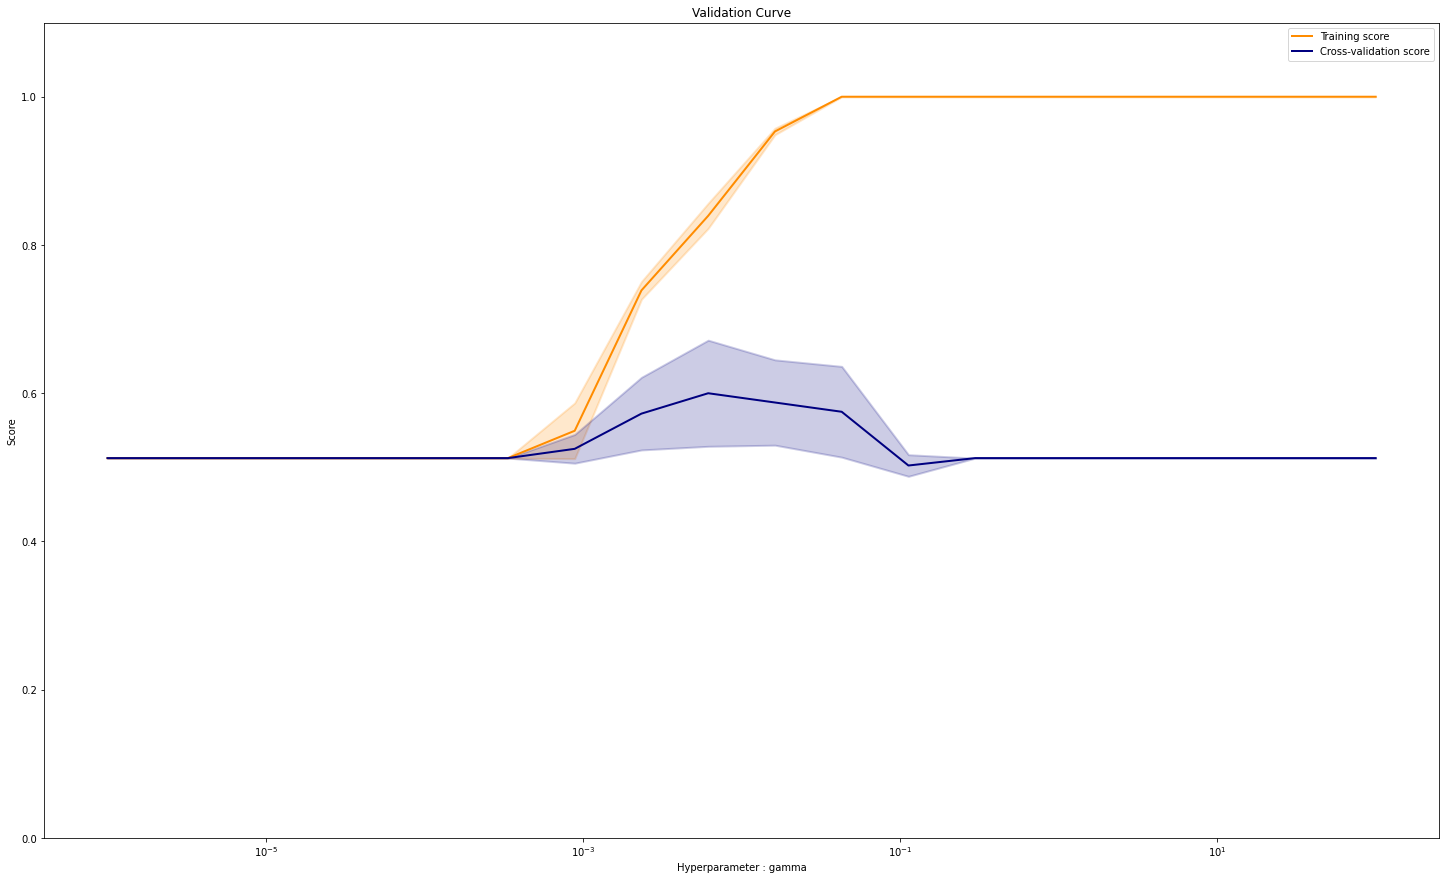

In [ ]:
plot_validationcurve("gamma", param_range_SVM, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std)

In [ ]:
train_scores_C, test_scores_C= validation_curve(
    SVC(), X_features, y_target, param_name="C", param_range=param_range_SVM,
    scoring="accuracy", n_jobs=1)

In [ ]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std= compute_acc_std_mean (train_scores_C, test_scores_C)

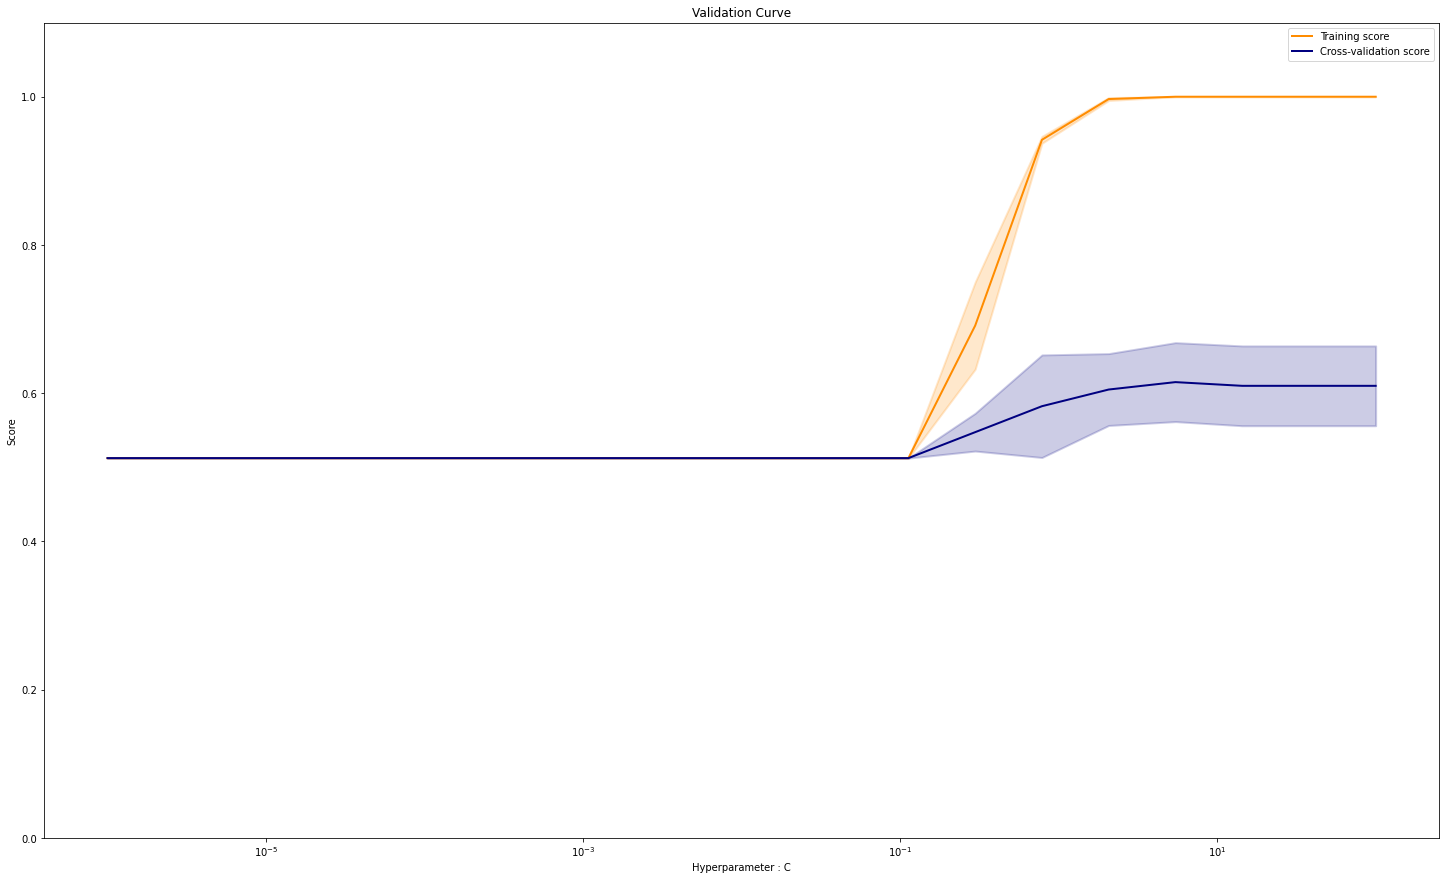

In [ ]:
plot_validationcurve("C", param_range_SVM, train_scores_mean, train_scores_std, 
                          test_scores_mean, test_scores_std)

In [ ]:
#model.get_params().keys()

param_grid_SVC = {'C': [0.01, 0.1, 1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4,  5, 10],
              'gamma': [0.00001, 0.00005,  0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 2, 3.5, 5, 10]}

best_estimator(model_SVC, param_grid_SVC, X_features, y_target, 10)

(SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False), {'C': 5, 'gamma': 0.01})

In [ ]:
model_best = SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)

K_fold cross validation

In [ ]:
score_kfold=cross_val_score(model_best, X_features, y_target, cv=10).mean() #cv is the number of folds
print(score_kfold)

0.65


Leave-one out cross validation


In [ ]:
score_leave_one_out= cross_val_score(model_best, X_features, y_target, cv=LeaveOneOut()).mean()
print(score_leave_one_out)

0.68


In [ ]:
svm_scores= [score_kfold, score_leave_one_out]

In [ ]:
classification_accuracy=pd.DataFrame()
classification_accuracy["SVM"]= svm_scores
classification_accuracy.set_axis(['KFold', 'LeaveOneOut'], axis='index')

,SVM
KFold,0.65
LeaveOneOut,0.68


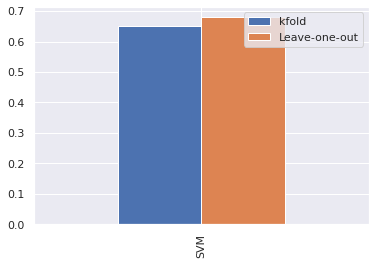

In [ ]:
sns.set()
classification_accuracy.T.plot(kind='bar').legend(['kfold', 'Leave-one-out'])


ADAboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(Xtrain, ytrain)

In [ ]:
y_pred = model1.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(ytest, y_pred))

AdaBoost Classifier Model Accuracy: 0.55


In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
from sklearn.svm import SVC


# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
svc=SVC(probability=True, kernel='linear')


# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1, random_state=0)


# train adaboost classifer
model2 = abc.fit(Xtrain, ytrain)


# predict the response for test dataset
y_pred = model2.predict(Xtest)


# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator:",accuracy_score(ytest, y_pred))

Model Accuracy with SVC Base Estimator: 0.6875


XGBOOST


In [ ]:
import xgboost as xgb
from sklearn import preprocessing


In [ ]:
robust = preprocessing.RobustScaler()
X_train=robust.fit_transform(Xtrain)
X_test=robust.transform(Xtest)

In [ ]:
dictio={'silent': False, 'n_jobs': -1, 'n_estimators': 100, 'gamma': 0.25}

In [ ]:
final_model = xgb.XGBClassifier(silent=True,
                            gamma=0.3,
                            n_estimators=150,
                            random_state=300,
                            n_jobs=-1)
final_model.fit(X_train, ytrain)
print(final_model.score(X_test, ytest))
print(final_model.score(X_train, ytrain))

0.6
1.0


In [ ]:
y_pred = final_model.predict(X_test)


# calculate and print model accuracy
print("Model Accuracy with xgboost Base Estimator:",accuracy_score(ytest, y_pred))

Model Accuracy with xgboost Base Estimator: 0.6
